In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")

In [43]:
intel_df = pd.read_csv("intel.csv")

In [44]:
intel_df["max_turbo_freq"] = (
    intel_df["max_turbo_freq"].str.replace(" GHz", "").astype(float)
)
intel_df["processor_base_freq"] = (
    intel_df["processor_base_freq"].str.replace(" GHz", "").astype(float)
)

In [45]:
import datetime
def parse_quarter(quarter_str):
    quarters = {'Q1': 1, 'Q2': 4, 'Q3': 7, 'Q4': 10}
    quarter, year = quarter_str.split("'")
    month = quarters[quarter]
    year = int("20" + year)
    return datetime.datetime(year, month, 1)


In [46]:
intel_df['launch_date'][0:5]

0    Q1'23
1    Q1'23
2    Q1'23
3    Q1'23
4    Q1'23
Name: launch_date, dtype: object

In [47]:
quarter_str = "Q1'23"
parsed_date = parse_quarter(quarter_str)
print(parsed_date)

2023-01-01 00:00:00


In [48]:
intel_df['launch_date'] = intel_df['launch_date'].apply(parse_quarter)


In [63]:
intel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           937 non-null    int64         
 1   product_name         937 non-null    object        
 2   launch_date          937 non-null    datetime64[ns]
 3   total_cores          937 non-null    int64         
 4   max_turbo_freq       810 non-null    float64       
 5   processor_base_freq  932 non-null    float64       
 6   cache                937 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 51.4+ KB


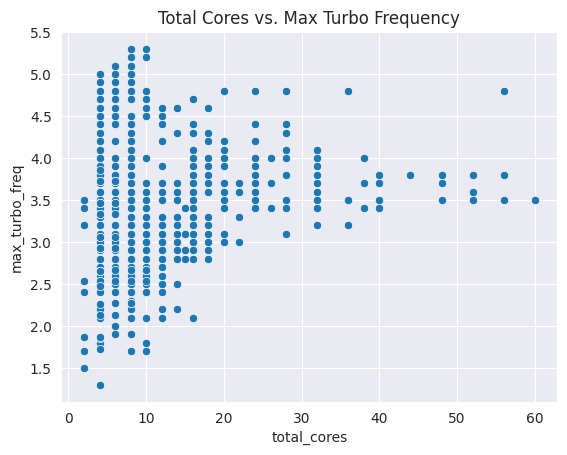

In [49]:
sns.scatterplot(data=intel_df, x="total_cores", y="max_turbo_freq")
plt.title("Total Cores vs. Max Turbo Frequency")
plt.show()

In [50]:
intel_df.describe()

,Unnamed: 0,launch_date,total_cores,max_turbo_freq,processor_base_freq
count,937.0000,937,937.000000,810.000000,932.000000
mean,468.0000,2015-12-13 16:31:14.919957248,11.266809,3.506346,2.543541
min,0.0000,2002-01-01 00:00:00,1.000000,1.300000,1.000000
25%,234.0000,2012-04-01 00:00:00,4.000000,3.000000,2.100000
50%,468.0000,2016-04-01 00:00:00,8.000000,3.500000,2.400000
75%,702.0000,2019-07-01 00:00:00,16.000000,3.900000,3.000000
max,936.0000,2023-01-01 00:00:00,60.000000,5.300000,4.100000
std,270.6329,NaN,9.777399,0.714643,0.597816


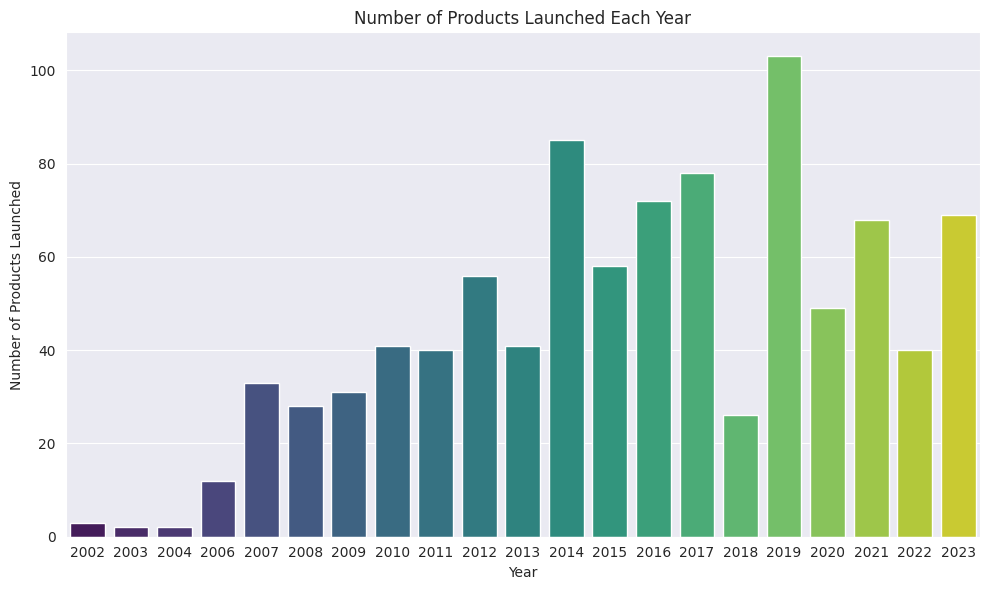

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(x=intel_df['launch_date'].dt.year, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Products Launched')
plt.title('Number of Products Launched Each Year')

# Remove any duplicate labels from x-axis
# plt.xticks(rotation=45, ha='right', labels=intel_df['launch_date'].dt.year.unique())

plt.tight_layout()
plt.show()


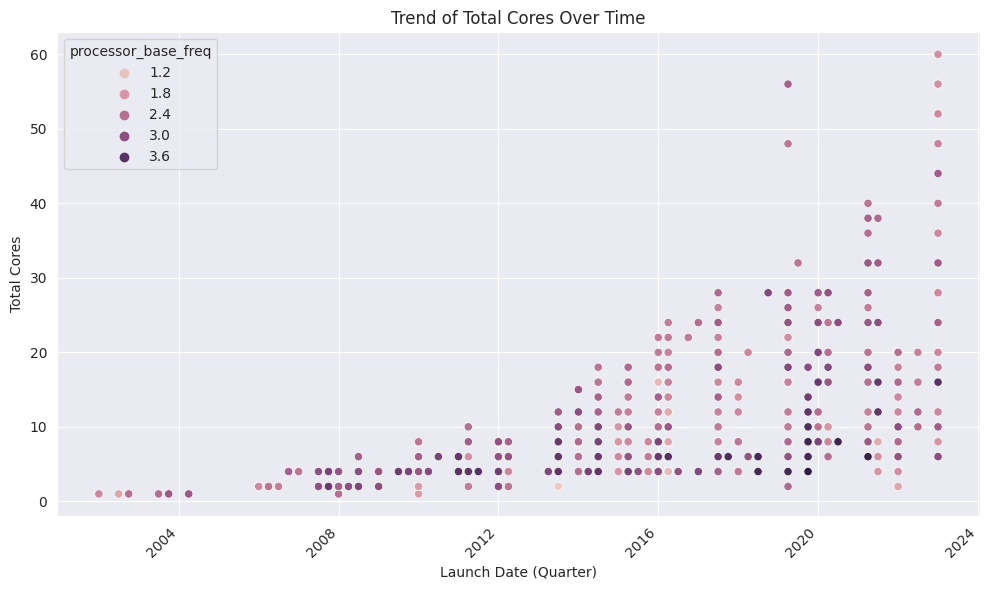

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='launch_date', y='total_cores', data=intel_df, hue='processor_base_freq')
plt.xlabel('Launch Date (Quarter)')
plt.ylabel('Total Cores')
plt.title('Trend of Total Cores Over Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()